In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re

import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats

In [57]:
df = pd.read_csv("data/df_cleaned.csv")
df.head()

event_id        player_id_home              name_home  \
0  sr:sport_event:42023445   sr:competitor:66968  Kudermetova, Veronika   
1  sr:sport_event:42023447   sr:competitor:41355            Bogdan, Ana   
2  sr:sport_event:42023449  sr:competitor:256547          Parks, Alycia   
3  sr:sport_event:42023459   sr:competitor:99131        Bucsa, Cristina   
4  sr:sport_event:42023461   sr:competitor:44834        Pegula, Jessica   

   seed_home  aces_home  backhand_errors_home  backhand_unforced_errors_home  \
0          0         14                    13                              8   
1          1          6                    12                              7   
2          1          5                     8                             17   
3          1          6                    34                             15   
4          0          3                    20                             14   

   backhand_winners_home  breakpoints_won_home  double_faults_home  ...  \
0                      9                     1                   1  ...   
1                      7                     3                   2  ...   
2                      3                     4                   5  ...   
3                     10                     6                   4  ...   
4                     11                     5                   3  ...   

   win_home  avg_set_length  avg_game_length  avg_points_per_game  \
0      True       50.983333         4.433333             6.913043   
1      True       72.141667         5.549359             6.769231   
2      True       50.866667         5.354386             7.210526   
3      True       54.772222         5.134896             7.187500   
4      True       46.783333         4.678333             6.600000   

   match_length  rs_home  rs_away  avg_set_diff  avg_set_games  sets  
0    101.966667     12.0    101.0      1.500000      11.500000     2  
1    144.283333     61.0     15.0      1.000000      13.000000     2  
2    101.733333     47.0     87.0      2.500000       9.500000     2  
3    164.316667     77.0     70.0      0.666667      10.666667     3  
4    140.350000      4.0     44.0      2.000000      10.000000     3  

[5 rows x 96 columns]

Combining similar variables (winners and errors) ..?

In [58]:
# errors = []
# unforced_errors = []
# winners = []
# for col in df.columns:
#     if "errors" in col:
#         er = re.match(r"^(.+_errors)(_[a-z]+)$", col).group(1) 
#         if "unforced" in col:
#             if er not in unforced_errors:
#                 unforced_errors.append(er)
#         else:
#             if er not in errors:
#                 errors.append(er)
#     elif "winners" in col:
#         win = re.match(r"^(.+_winners)(_[a-z]+)$", col).group(1) 
#         if win not in winners:
#             winners.append(win)

# print(errors)
# print(unforced_errors)
# print(winners)


In [59]:
# # add double faults to errors
# errors.append("double_faults")

In [60]:
# for who in ['_home','_away']:
#     df["errors"+who] = df[[err+who for err in errors]].sum(axis=1)
#     df["unforced_errors"+who] = df[[err+who for err in unforced_errors]].sum(axis=1)
#     df['winners'+who] = df[[win+who for win in winners]].sum(axis=1)
#     df = df.drop(columns = [err+who for err in errors]+[err+who for err in unforced_errors]+[win+who for win in winners])

In [61]:
df.head()

event_id        player_id_home              name_home  \
0  sr:sport_event:42023445   sr:competitor:66968  Kudermetova, Veronika   
1  sr:sport_event:42023447   sr:competitor:41355            Bogdan, Ana   
2  sr:sport_event:42023449  sr:competitor:256547          Parks, Alycia   
3  sr:sport_event:42023459   sr:competitor:99131        Bucsa, Cristina   
4  sr:sport_event:42023461   sr:competitor:44834        Pegula, Jessica   

   seed_home  aces_home  backhand_errors_home  backhand_unforced_errors_home  \
0          0         14                    13                              8   
1          1          6                    12                              7   
2          1          5                     8                             17   
3          1          6                    34                             15   
4          0          3                    20                             14   

   backhand_winners_home  breakpoints_won_home  double_faults_home  ...  \
0                      9                     1                   1  ...   
1                      7                     3                   2  ...   
2                      3                     4                   5  ...   
3                     10                     6                   4  ...   
4                     11                     5                   3  ...   

   win_home  avg_set_length  avg_game_length  avg_points_per_game  \
0      True       50.983333         4.433333             6.913043   
1      True       72.141667         5.549359             6.769231   
2      True       50.866667         5.354386             7.210526   
3      True       54.772222         5.134896             7.187500   
4      True       46.783333         4.678333             6.600000   

   match_length  rs_home  rs_away  avg_set_diff  avg_set_games  sets  
0    101.966667     12.0    101.0      1.500000      11.500000     2  
1    144.283333     61.0     15.0      1.000000      13.000000     2  
2    101.733333     47.0     87.0      2.500000       9.500000     2  
3    164.316667     77.0     70.0      0.666667      10.666667     3  
4    140.350000      4.0     44.0      2.000000      10.000000     3  

[5 rows x 96 columns]

In [62]:
sorted(df.columns)

['aces_away',
 'aces_home',
 'avg_game_length',
 'avg_points_per_game',
 'avg_set_diff',
 'avg_set_games',
 'avg_set_length',
 'backhand_errors_away',
 'backhand_errors_home',
 'backhand_unforced_errors_away',
 'backhand_unforced_errors_home',
 'backhand_winners_away',
 'backhand_winners_home',
 'best_of',
 'breakpoints_won_away',
 'breakpoints_won_home',
 'competition',
 'date',
 'double_faults_away',
 'double_faults_home',
 'drop_shot_unforced_errors_away',
 'drop_shot_unforced_errors_home',
 'drop_shot_winners_away',
 'drop_shot_winners_home',
 'event_id',
 'first_serve_points_won_away',
 'first_serve_points_won_home',
 'first_serve_successful_away',
 'first_serve_successful_home',
 'forehand_errors_away',
 'forehand_errors_home',
 'forehand_unforced_errors_away',
 'forehand_unforced_errors_home',
 'forehand_winners_away',
 'forehand_winners_home',
 'games_won_away',
 'games_won_home',
 'groundstroke_errors_away',
 'groundstroke_errors_home',
 'groundstroke_unforced_errors_away',
 '

In [63]:
context_vars = ["event_id","date","name_home","name_away","competition","player_id_home","player_id_away", "best_of","round"]
context = df[context_vars]

In [64]:
stats_df = df.drop(columns = context_vars)
stats_df.insert(0, "men", stats_df.pop("men"))
stats_df

men  seed_home  aces_home  backhand_errors_home  \
0    False          0         14                    13   
1    False          1          6                    12   
2    False          1          5                     8   
3    False          1          6                    34   
4    False          0          3                    20   
..     ...        ...        ...                   ...   
940   True          0          8                    10   
941   True          0          3                     5   
942   True          1          5                    20   
943   True          0          0                    25   
944   True          0          6                    12   

     backhand_unforced_errors_home  backhand_winners_home  \
0                                8                      9   
1                                7                      7   
2                               17                      3   
3                               15                     10   
4                               14                     11   
..                             ...                    ...   
940                             11                      7   
941                             10                     12   
942                             11                      4   
943                             14                     12   
944                             22                      6   

     breakpoints_won_home  double_faults_home  drop_shot_unforced_errors_home  \
0                       1                   1                               0   
1                       3                   2                               0   
2                       4                   5                               0   
3                       6                   4                               0   
4                       5                   3                               0   
..                    ...                 ...                             ...   
940                     9                   9                               0   
941                     4                   3                               0   
942                     2                   5                               0   
943                     1                   0                               0   
944                     1                   6                               0   

     drop_shot_winners_home  ...  win_home  avg_set_length  avg_game_length  \
0                         0  ...      True       50.983333         4.433333   
1                         0  ...      True       72.141667         5.549359   
2                         0  ...      True       50.866667         5.354386   
3                         0  ...      True       54.772222         5.134896   
4                         0  ...      True       46.783333         4.678333   
..                      ...  ...       ...             ...              ...   
940                       0  ...      True       55.894444         5.782184   
941                       0  ...      True       50.033333         5.559259   
942                       0  ...     False       53.683333         5.368333   
943                       0  ...     False       49.737500         5.235526   
944                       0  ...     False       65.744444         6.362366   

     avg_points_per_game  match_length  rs_home  rs_away  avg_set_diff  \
0               6.913043    101.966667     12.0    101.0      1.500000   
1               6.769231    144.283333     61.0     15.0      1.000000   
2               7.210526    101.733333     47.0     87.0      2.500000   
3               7.187500    164.316667     77.0     70.0      0.666667   
4               6.600000    140.350000      4.0     44.0      2.000000   
..                   ...           ...      ...      ...           ...   
940             6.827586    167.683333      3.0      8.0      2.333333   
941             6.444444    150.100000      1.0     12.0      3

In [65]:
stats_df['avg_set_diff'] = abs(stats_df['avg_set_diff'])

In [66]:
overall_stats = []
specific_stats = set()
specific_stats_all = []
for col in stats_df.columns:
    if "home" not in col and "away" not in col:
        overall_stats_df.append(col)
    elif "home" in col:
        specific_stats.add(re.match(r"^(.*?)\_home",col).group(1))
        specific_stats_all.append(col)
    elif "away" in col:
        specific_stats.add(re.match(r"^(.*?)\_away",col).group(1))
        specific_stats_all.append(col)

NameError: name 'overall_stats_df' is not defined

In [ ]:
overall_stats
# Only match_length from this list needs to be 'normalized'

['men',
 'avg_set_length',
 'avg_game_length',
 'avg_points_per_game',
 'match_length',
 'avg_set_diff',
 'avg_set_games',
 'sets']

New feature?

In [ ]:
# df['expected_win'] = (df['win'+h] & df['rs_diff']>0) | (~df['win'+h] & df['rs_diff']<0)

In [ ]:
h = '_home'
a = '_away'

def both(col):
    return [col+h,col+a]

In [ ]:
from itertools import chain
# Normalize by dividing by the number of sets played in a given match
to_normalize = list(specific_stats_all.copy())
not_to = both('rs')+both('max_games_in_a_row')+both('max_points_in_a_row')+both('seed')+both('win')
to_normalize = [x for x in to_normalize if x not in not_to]
to_normalize.append('match_length')
stats_df[to_normalize] = stats_df[to_normalize].div(df['sets'], axis=0)

In [ ]:
stats_df

men  seed_home  aces_home  backhand_errors_home  \
0    False          0   7.000000              6.500000   
1    False          1   3.000000              6.000000   
2    False          1   2.500000              4.000000   
3    False          1   2.000000             11.333333   
4    False          0   1.000000              6.666667   
..     ...        ...        ...                   ...   
940   True          0   2.666667              3.333333   
941   True          0   1.000000              1.666667   
942   True          1   1.666667              6.666667   
943   True          0   0.000000              6.250000   
944   True          0   2.000000              4.000000   

     backhand_unforced_errors_home  backhand_winners_home  \
0                         4.000000               4.500000   
1                         3.500000               3.500000   
2                         8.500000               1.500000   
3                         5.000000               3.333333   
4                         4.666667               3.666667   
..                             ...                    ...   
940                       3.666667               2.333333   
941                       3.333333               4.000000   
942                       3.666667               1.333333   
943                       3.500000               3.000000   
944                       7.333333               2.000000   

     breakpoints_won_home  double_faults_home  drop_shot_unforced_errors_home  \
0                0.500000            0.500000                             0.0   
1                1.500000            1.000000                             0.0   
2                2.000000            2.500000                             0.0   
3                2.000000            1.333333                             0.0   
4                1.666667            1.000000                             0.0   
..                    ...                 ...                             ...   
940              3.000000            3.000000                             0.0   
941              1.333333            1.000000                             0.0   
942              0.666667            1.666667                             0.0   
943              0.250000            0.000000                             0.0   
944              0.333333            2.000000                             0.0   

     drop_shot_winners_home  ...  win_home  avg_set_length  avg_game_length  \
0                       0.0  ...      True       50.983333         4.433333   
1                       0.0  ...      True       72.141667         5.549359   
2                       0.0  ...      True       50.866667         5.354386   
3                       0.0  ...      True       54.772222         5.134896   
4                       0.0  ...      True       46.783333         4.678333   
..                      ...  ...       ...             ...              ...   
940                     0.0  ...      True       55.894444         5.782184   
941                     0.0  ...      True       50.033333         5.559259   
942                     0.0  ...     False       53.683333         5.368333   
943                     0.0  ...     False       49.737500         5.235526   
944                     0.0  ...     False       65.744444         6.362366   

     avg_points_per_game  match_length  rs_home  rs_away  avg_set_diff  \
0               6.913043     50.983333     12.0    101.0      1.500000   
1               6.769231     72.141667     61.0     15.0      1.000000   
2               7.210526     50.866667     47.0     87.0      2.500000   
3               7.187500     54.772222     77.0     70.0      0.666667   
4               6.600000     46.783333      4.0     44.0      2.000000   
..                   ...           ...      ...      ...           ...   
940             6.827586     55.894444      3.0      8.0      2.333333   
941             6.444444     50.033333      1.0     12.0      3

Combining home and away variables with the underyling motive to detect matches with similar 
'competitiveness'

In [ ]:
def dist_measures(dist):
    mean = np.mean(dist)
    median = np.median(dist)
    std = np.std(dist)
    if std==0:
        skew = 0
    else:
        skew = 3*(mean-median)/std
    return [mean, median, skew, std]

def plt_dist(df, var, xlabel= None):
    m_dist = df[df['men']][var]
    w_dist = df[~df['men']][var]
    [m_mean, m_median, m_skew, m_std] = dist_measures(m_dist)
    [w_mean, w_median, w_skew, w_std] = dist_measures(w_dist)
    metric = "Mean" # default metric is mean
    m_metric = m_mean
    w_metric = w_mean
    # Assume skewness is >0 since there will be no negative values (FOR NOW)
    if m_skew > .5 or w_skew >.5: # if one of the distributions is skewed heavily..
        metric = "Median"
        m_metric = m_median
        w_metric = w_median

    if xlabel is None:
        xlabel = var.replace("_"," ").title()

    plt.hist(m_dist, alpha=0.4, label='Mens', color = 'blue') #0d98ba
    plt.hist(w_dist, alpha=0.4, label='Womens', color = 'orange') #7804b3
    
    plt.axvline(m_metric, color = 'blue', linestyle='dashed', linewidth=2)
    plt.axvline(w_metric, color='orange', linestyle='dashed', linewidth=2)
    plt.title("Dashed Line represents "+metric, fontsize = 7)
    plt.suptitle(var.replace("_"," ").title())
    plt.xlabel(xlabel)
    plt.ylabel("Matches")
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
specific_stats.remove('rs')
specific_stats.remove('seed')
specific_stats.remove('win')

In [ ]:
features_diff = []
for stat in specific_stats:
    stats_df[stat+"_diff"] = abs(stats_df[stat+h]-stats_df[stat+a])
    features_diff.append(stat+"_diff")

features_diff.append("avg_set_diff")

for x in [x for x in overall_stats if x not in ['match_length','sets','men']]:
    features_diff.append(x)


/var/folders/7_/mtdhgw6s63dc18509m14sztm0000gn/T/ipykernel_26540/574059467.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stats[stat+"_diff"] = abs(stats[stat+h]-stats[stat+a])
/var/folders/7_/mtdhgw6s63dc18509m14sztm0000gn/T/ipykernel_26540/574059467.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stats[stat+"_diff"] = abs(stats[stat+h]-stats[stat+a])
/var/folders/7_/mtdhgw6s63dc18509m14sztm0000gn/T/ipykernel_26540/574059467.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

To aggregate errors or not?? Leads me to a question of which variables should stay and which should not
I will remove all variables that basically tell me nothing, mean and std around zero

In [ ]:
# Remove features whose mean and variance < 1
to_remove = []
for feature in specific_stats:
    ms = dist_measures(stats_df[feature+"_diff"])
    ms_h = dist_measures(stats_df[feature+h])
    ms_a = dist_measures(stats_df[feature+a])
    if ms_h[0] < 1 and ms_h[0] < 1 and ms_h[3] < 1 and ms_a[3] <1:
        # print(feature)
        # print(ms_h)
        # print(ms_a)
        # plt_dist(stats, feature+h)
        to_remove.append(feature+"_diff")

features_diff = list(set(features_diff) - set(to_remove))

In [ ]:
features_diff_df = stats_df[features_diff]

Check data points in features_diff for linearity

In [ ]:
features_diff_df.head()

second_serve_points_won_diff  backhand_unforced_errors_diff  \
0                      1.000000                       1.500000   
1                      2.500000                       7.000000   
2                      1.000000                       5.000000   
3                      2.666667                       0.333333   
4                      3.333333                       1.000000   

   breakpoints_won_diff  second_serve_successful_diff  forehand_winners_diff  \
0              0.500000                      2.500000               6.000000   
1              0.000000                      0.000000               5.000000   
2              1.500000                      2.500000               4.500000   
3              0.333333                      2.333333               3.333333   
4              1.000000                      2.000000               1.666667   

   first_serve_successful_diff  service_points_lost_diff  \
0                     1.000000                  4.000000   
1                     9.500000                  3.000000   
2                     5.000000                  8.000000   
3                     0.333333                  2.333333   
4                     0.000000                  2.333333   

   forehand_unforced_errors_diff  avg_points_per_game  avg_set_length  ...  \
0                       4.000000             6.913043       50.983333  ...   
1                       5.500000             6.769231       72.141667  ...   
2                       4.500000             7.210526       50.866667  ...   
3                       3.000000             7.187500       54.772222  ...   
4                       1.333333             6.600000       46.783333  ...   

   service_games_won_diff  forehand_errors_diff  groundstroke_errors_diff  \
0                0.500000              1.500000                  2.500000   
1                0.000000              3.000000                  2.500000   
2                1.000000              2.500000                  2.500000   
3                0.000000              1.000000                  2.666667   
4                1.333333              1.666667                  3.333333   

   first_serve_points_won_diff  avg_set_games  games_won_diff  \
0                     2.500000      11.500000        1.500000   
1                     3.500000      13.000000        1.000000   
2                     0.500000       9.500000        2.500000   
3                     2.333333      10.666667        0.666667   
4                     0.333333      10.000000        2.000000   

   double_faults_diff  backhand_errors_diff  service_points_won_diff  \
0            1.000000              1.000000                 1.500000   
1            0.500000              1.000000                 6.000000   
2            0.000000              1.000000                 0.500000   
3            0.666667              3.333333                 0.333333   
4            0.666667              1.000000                 3.666667   

   points_won_diff  
0              5.5  
1              3.0  
2              8.5  
3              2.0  
4              6.0  

[5 rows x 30 columns]

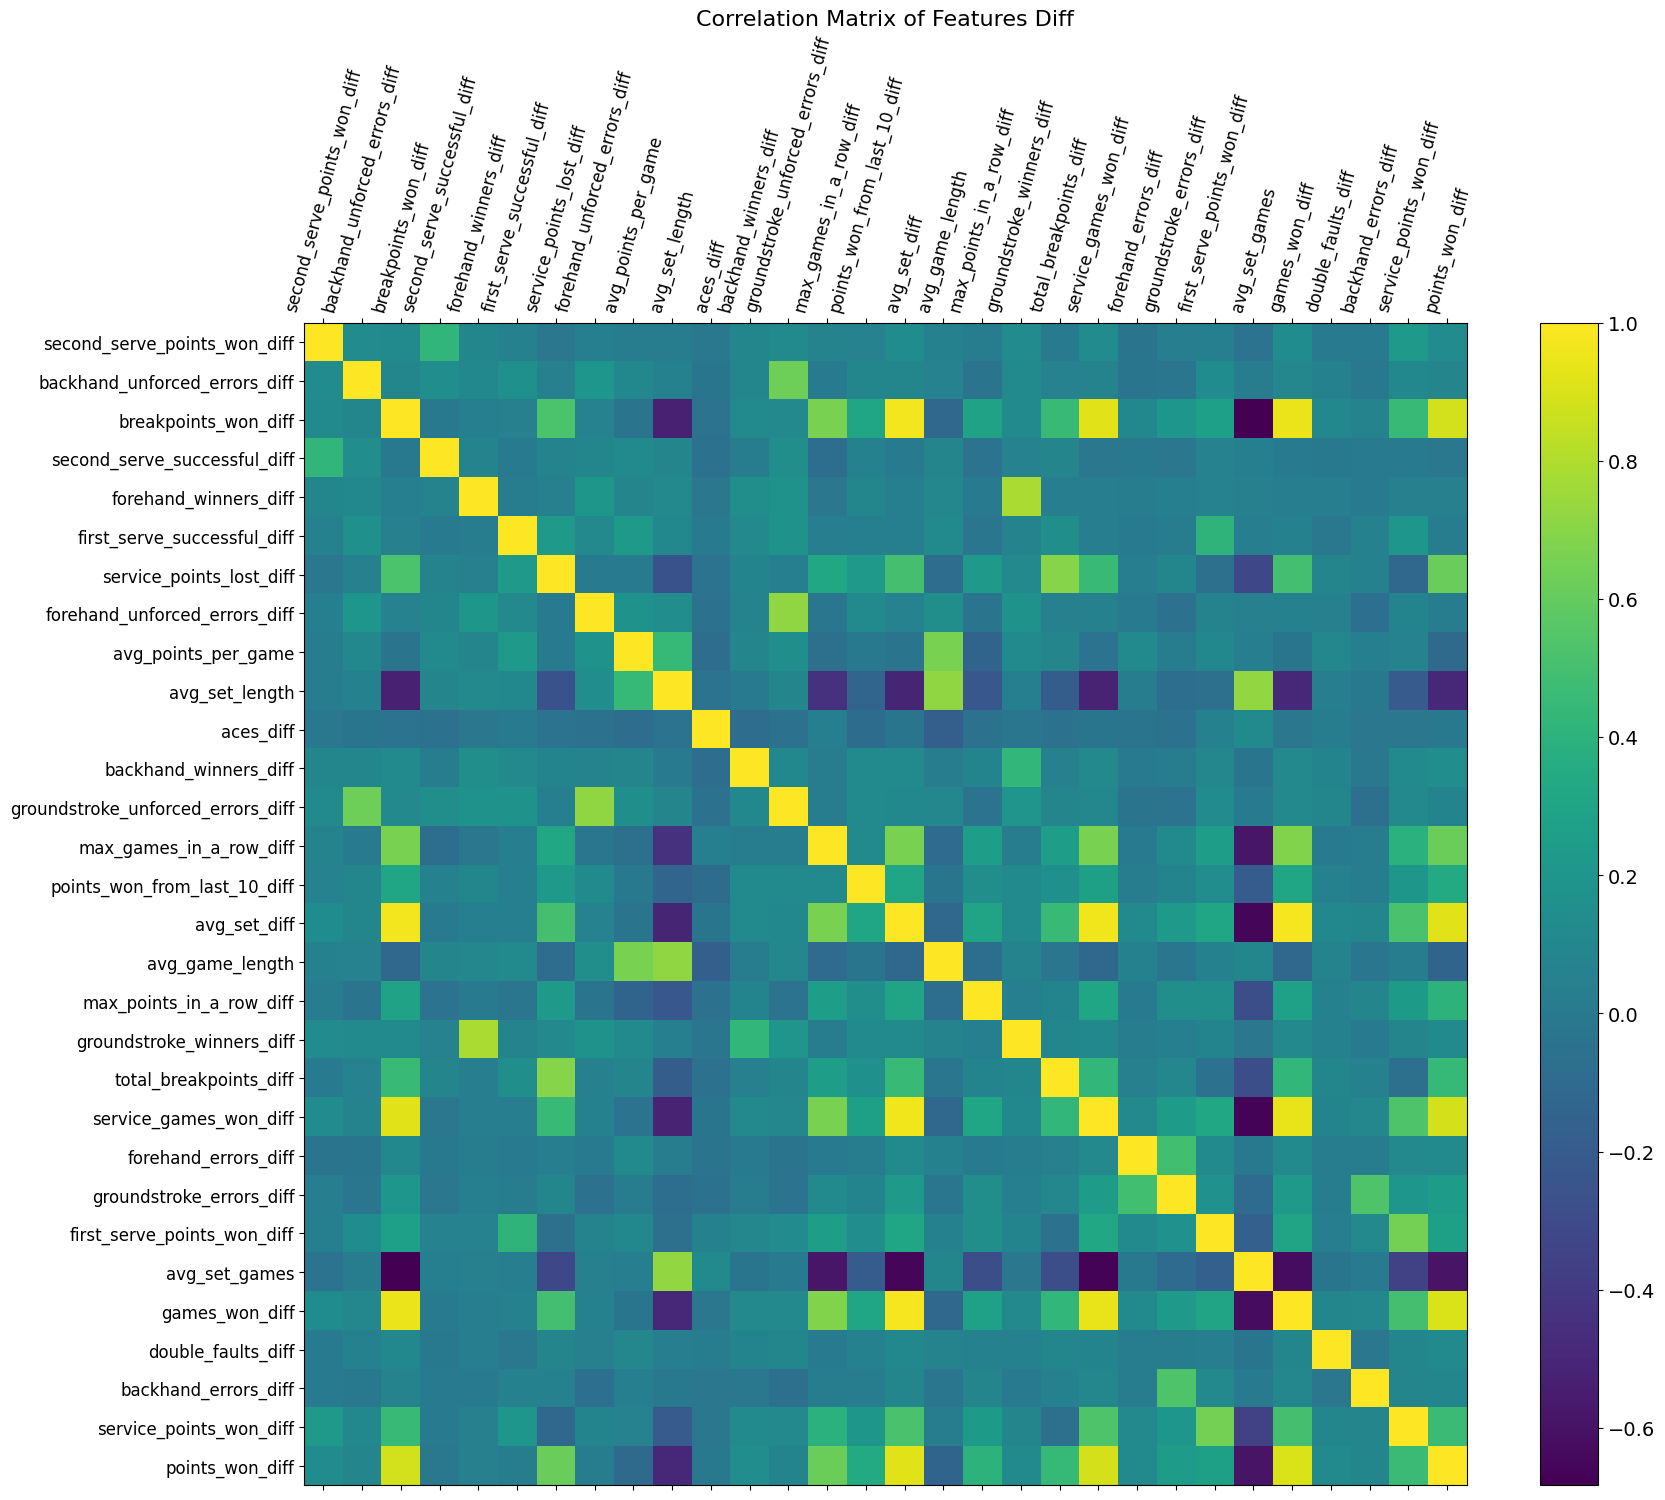

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(features_diff_df.corr(), fignum=f.number)
plt.xticks(range(features_diff_df.select_dtypes(['number']).shape[1]), features_diff_df.select_dtypes(['number']).columns, fontsize=12, rotation=75)
plt.yticks(range(features_diff_df.select_dtypes(['number']).shape[1]), features_diff_df.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of Features Diff', fontsize=16);

In [ ]:
#features_diff_df.columns

to_try = ['aces_diff','double_faults_diff','points_won_diff','avg_points_per_game','avg_game_length','groundstroke_errors_diff','service_games_won_diff','breakpoints_won_diff','backhand_winners_diff','forehand_winners_diff']

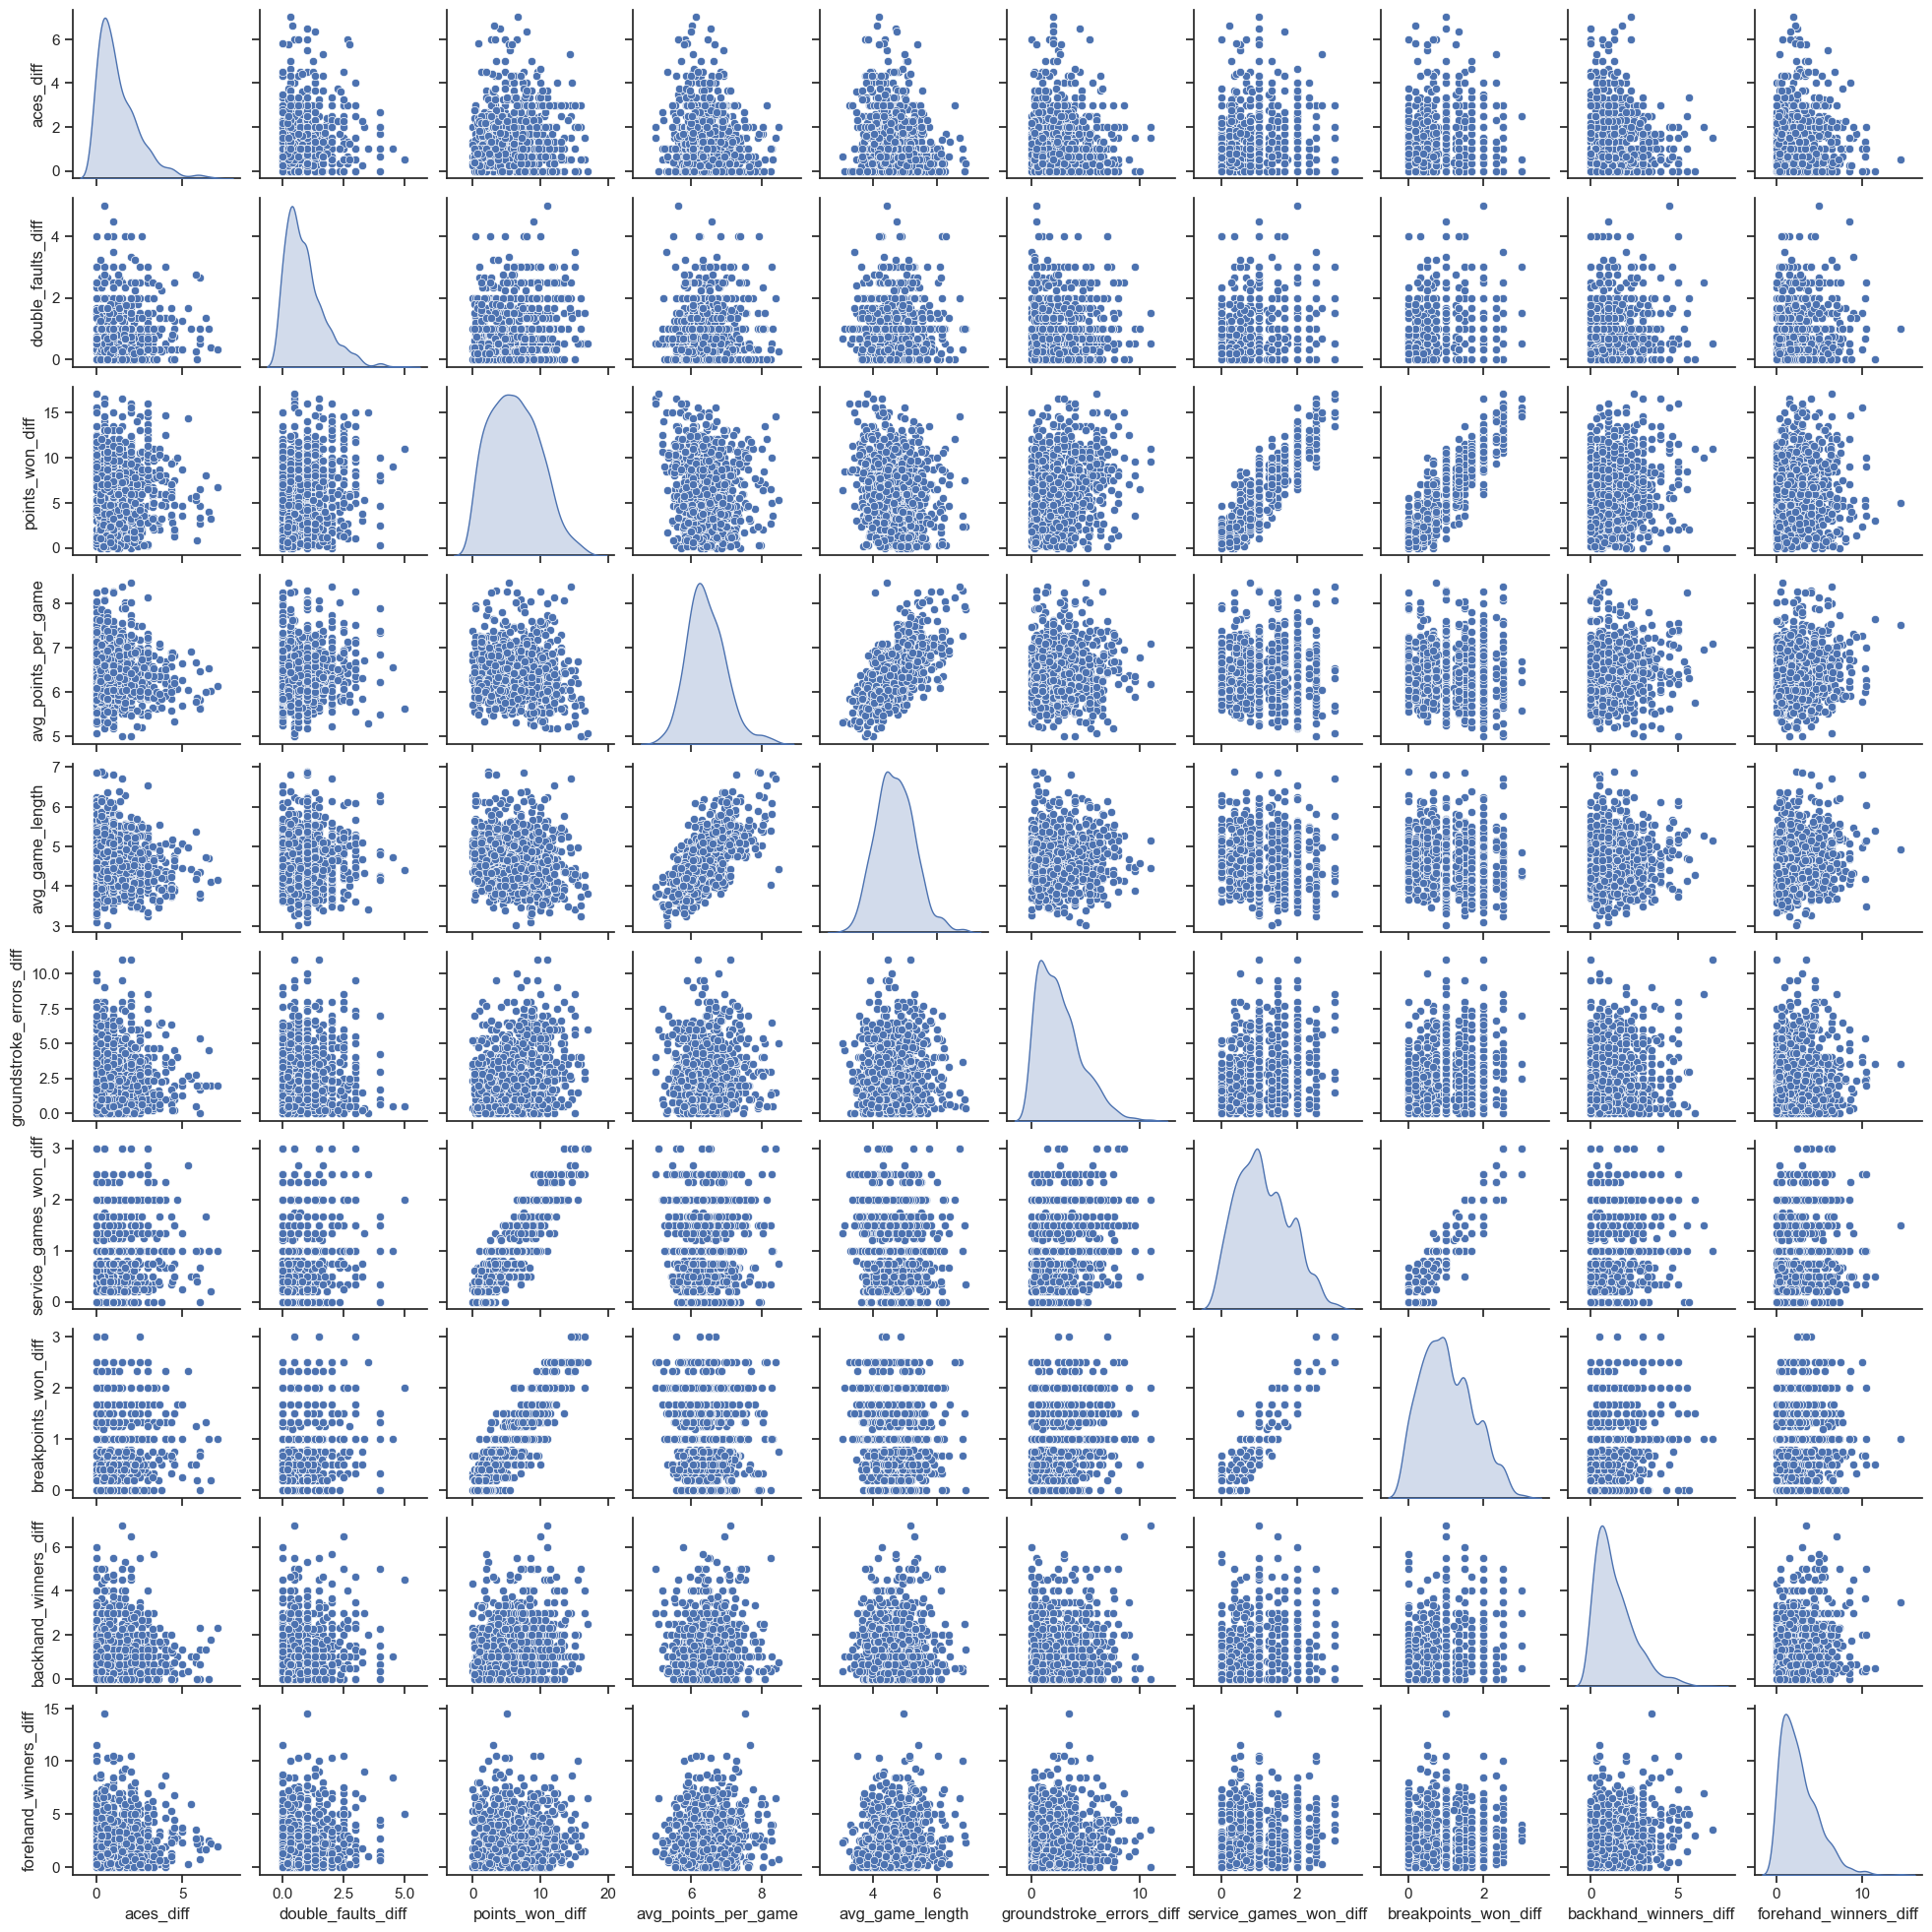

In [ ]:
sns.set(style="ticks")
sns.pairplot(features_diff_df[to_try], height=2, markers='o', diag_kind='kde')

# Show the plots
plt.show()

In [ ]:
features_diff_df_log = features_diff_df.copy()

for feature in to_try:
    features_diff_df_log[feature] = features_diff_df[feature].apply(lambda x: 0 if x == 0 else np.log(x))

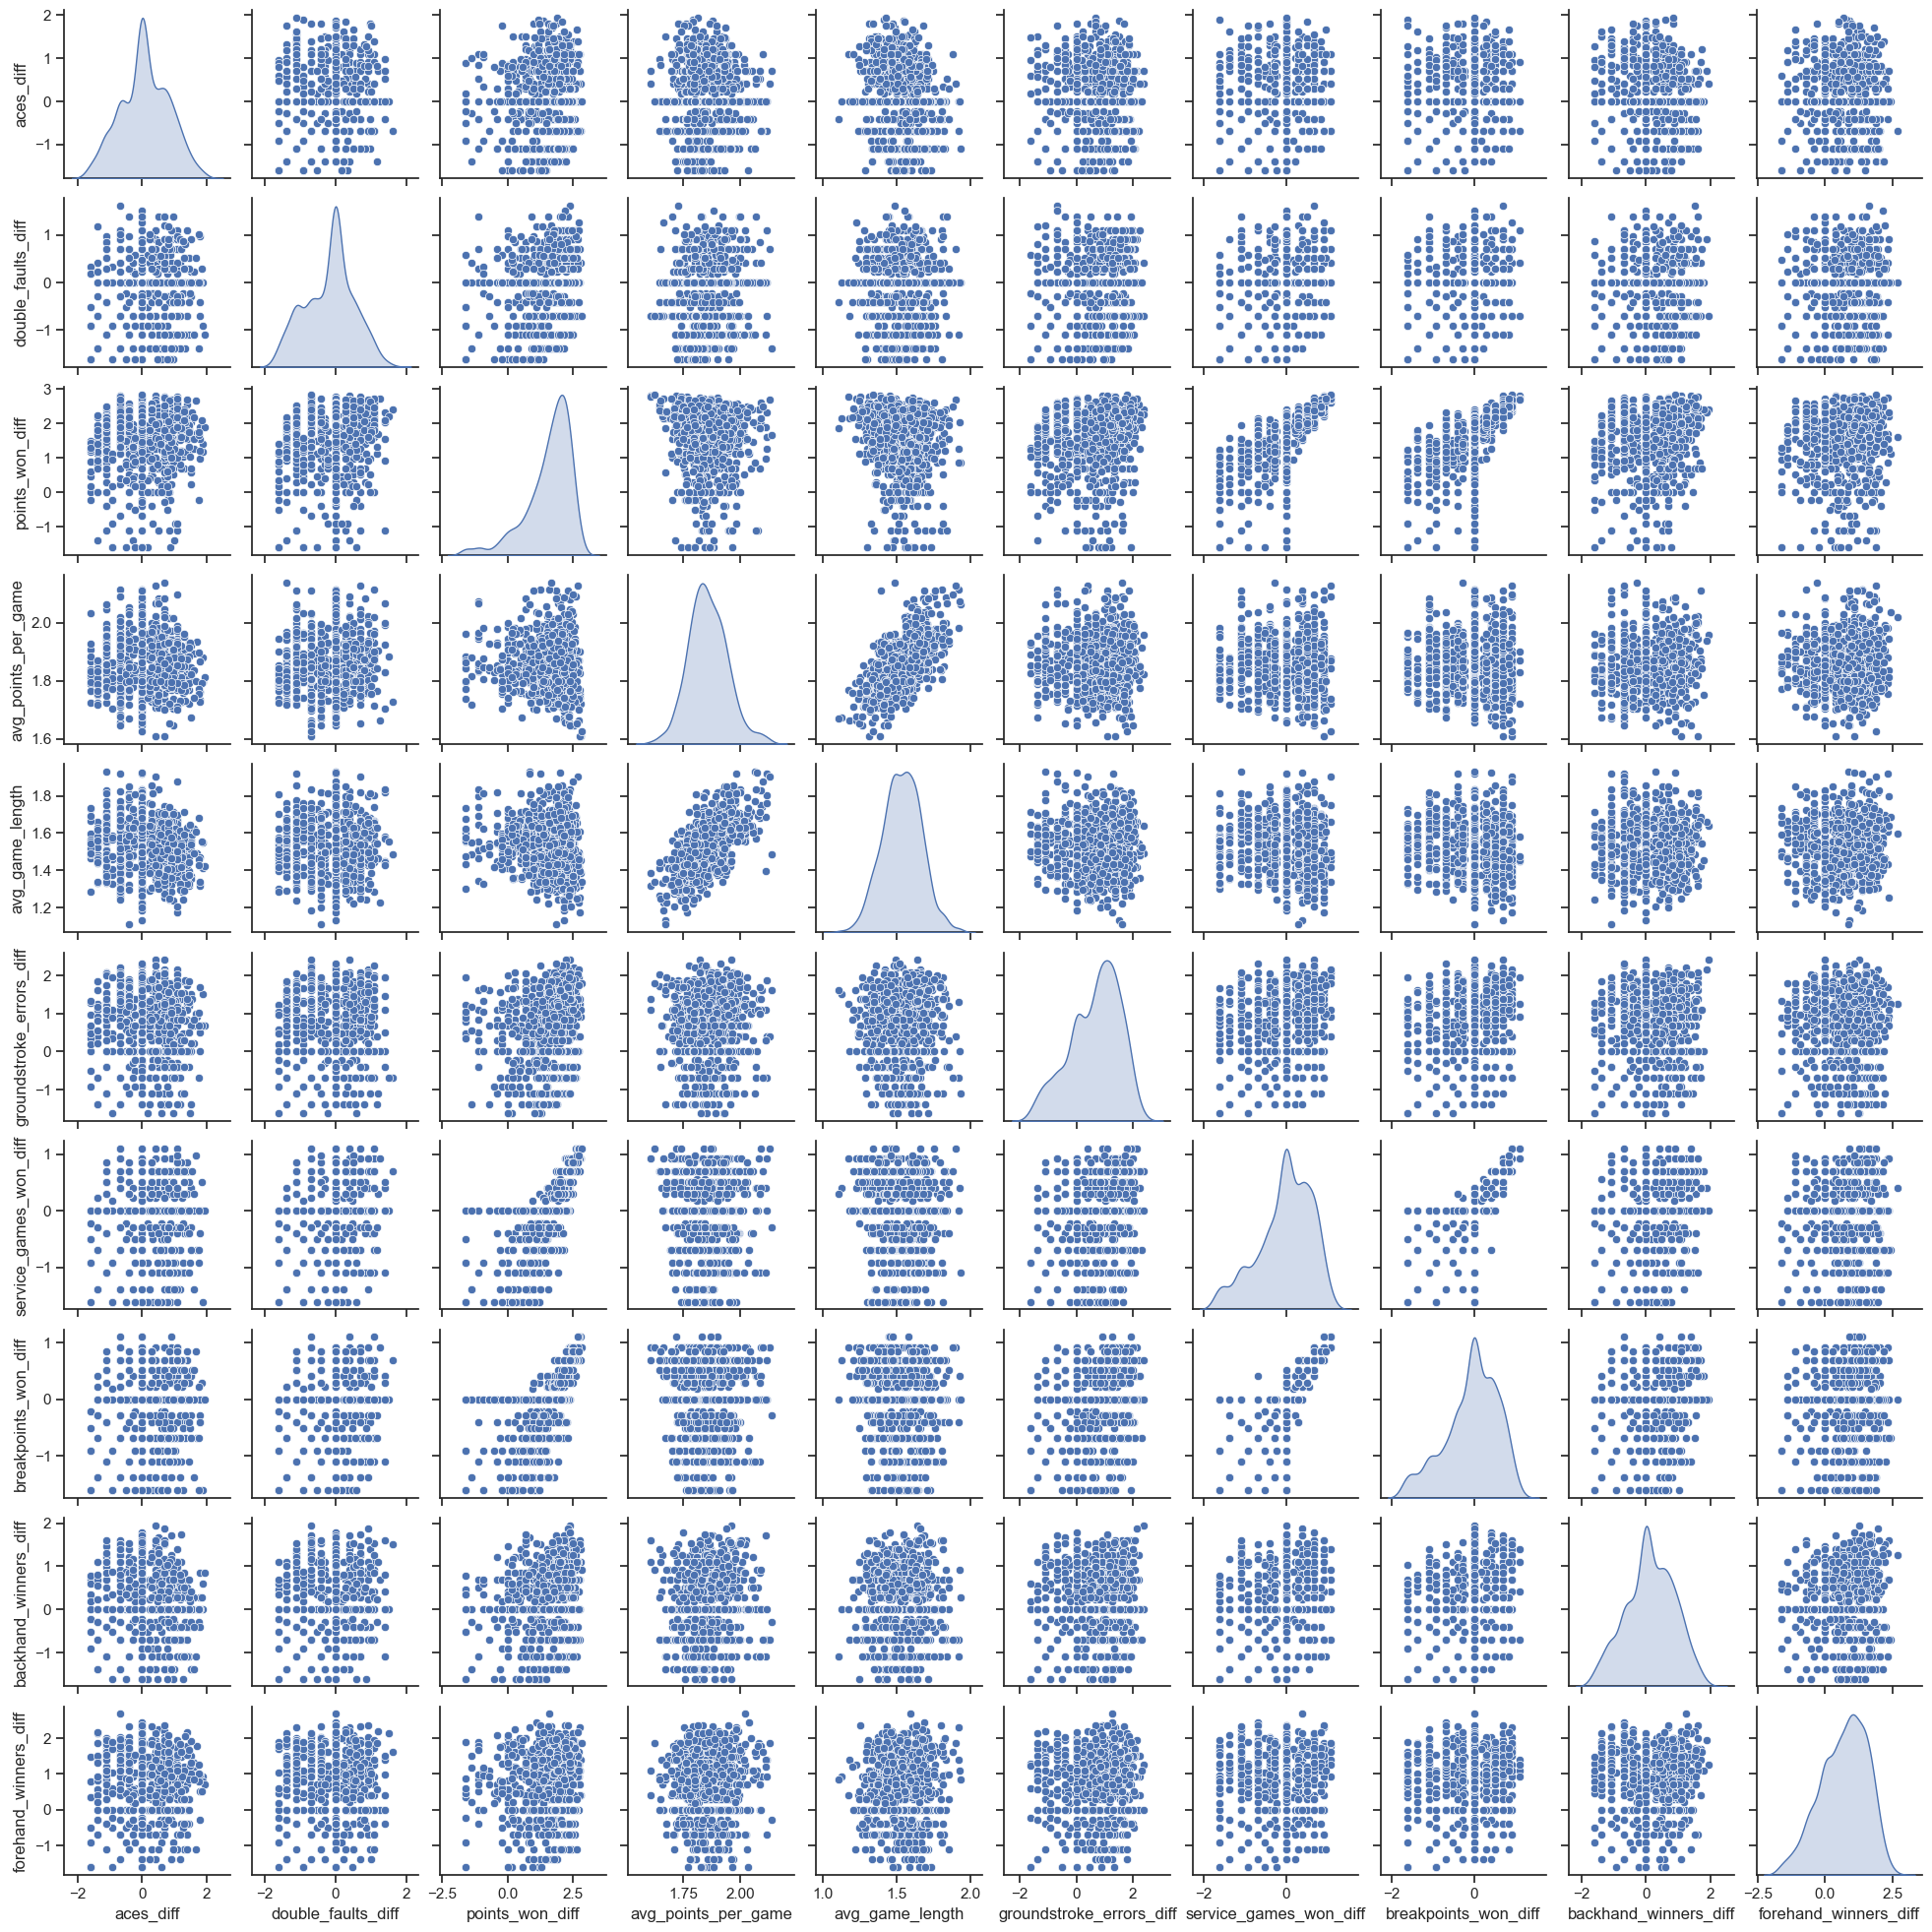

In [ ]:
sns.set(style="ticks")
sns.pairplot(features_diff_df_log[to_try], height=2, markers='o', diag_kind='kde')

# Show the plots
plt.show()

Checking for normativity

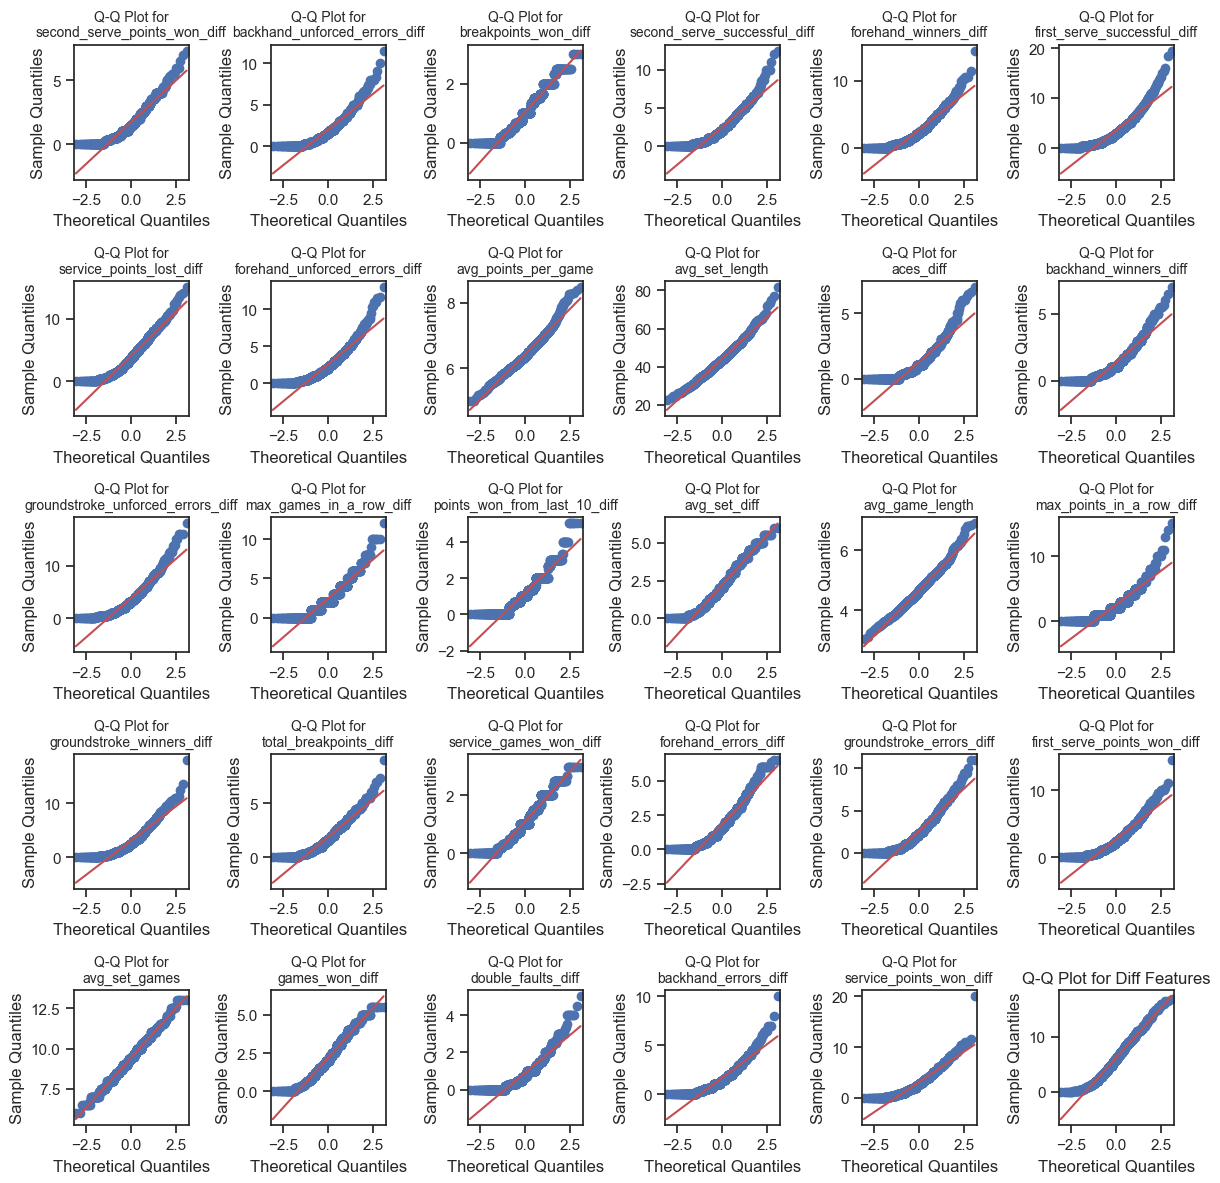

In [69]:
# Create a grid of Q-Q plots
fig, axes = plt.subplots(5, 6, figsize=(12, 12))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through each column and create a Q-Q plot
for i, column in enumerate(features_diff_df.columns):
    sm.qqplot(features_diff_df[column], line='s', ax=axes[i])
    axes[i].set_title(f'Q-Q Plot for\n{column}', fontsize = 10)

# Adjust layout
plt.tight_layout()
plt.show()

In [75]:
from scipy.stats import shapiro

not_normal = []
normal = []
# Example: Shapiro-Wilk test for normality
for feature in features_diff_df.columns:
    stat, p_value = shapiro(features_diff_df[feature])
    print(f"{feature} SW test stat: {stat}, p-value: {p_value}")
    if p_value < .05:
        not_normal.append(feature)
    else:
        normal.append(feature)

print(not_normal)
print(normal)

second_serve_points_won_diff SW test stat: 0.9267757882764953, p-value: 4.734249861936878e-21
backhand_unforced_errors_diff SW test stat: 0.8940363344421107, p-value: 5.623522369230085e-25
breakpoints_won_diff SW test stat: 0.9573380156064473, p-value: 5.871265456943793e-16
second_serve_successful_diff SW test stat: 0.9109302978868066, p-value: 4.358179213493975e-23
forehand_winners_diff SW test stat: 0.9085744599513031, p-value: 2.2928752808647577e-23
first_serve_successful_diff SW test stat: 0.8846204371051398, p-value: 6.237304013308865e-26
service_points_lost_diff SW test stat: 0.9549297043620655, p-value: 1.9312220379101307e-16
forehand_unforced_errors_diff SW test stat: 0.9049161081873845, p-value: 8.665894229963561e-24
avg_points_per_game SW test stat: 0.979428161493757, p-value: 2.734135709726204e-10
avg_set_length SW test stat: 0.9876699072032463, p-value: 3.89918762925797e-07
aces_diff SW test stat: 0.8646039561251213, p-value: 8.888382312722064e-28
backhand_winners_diff SW t

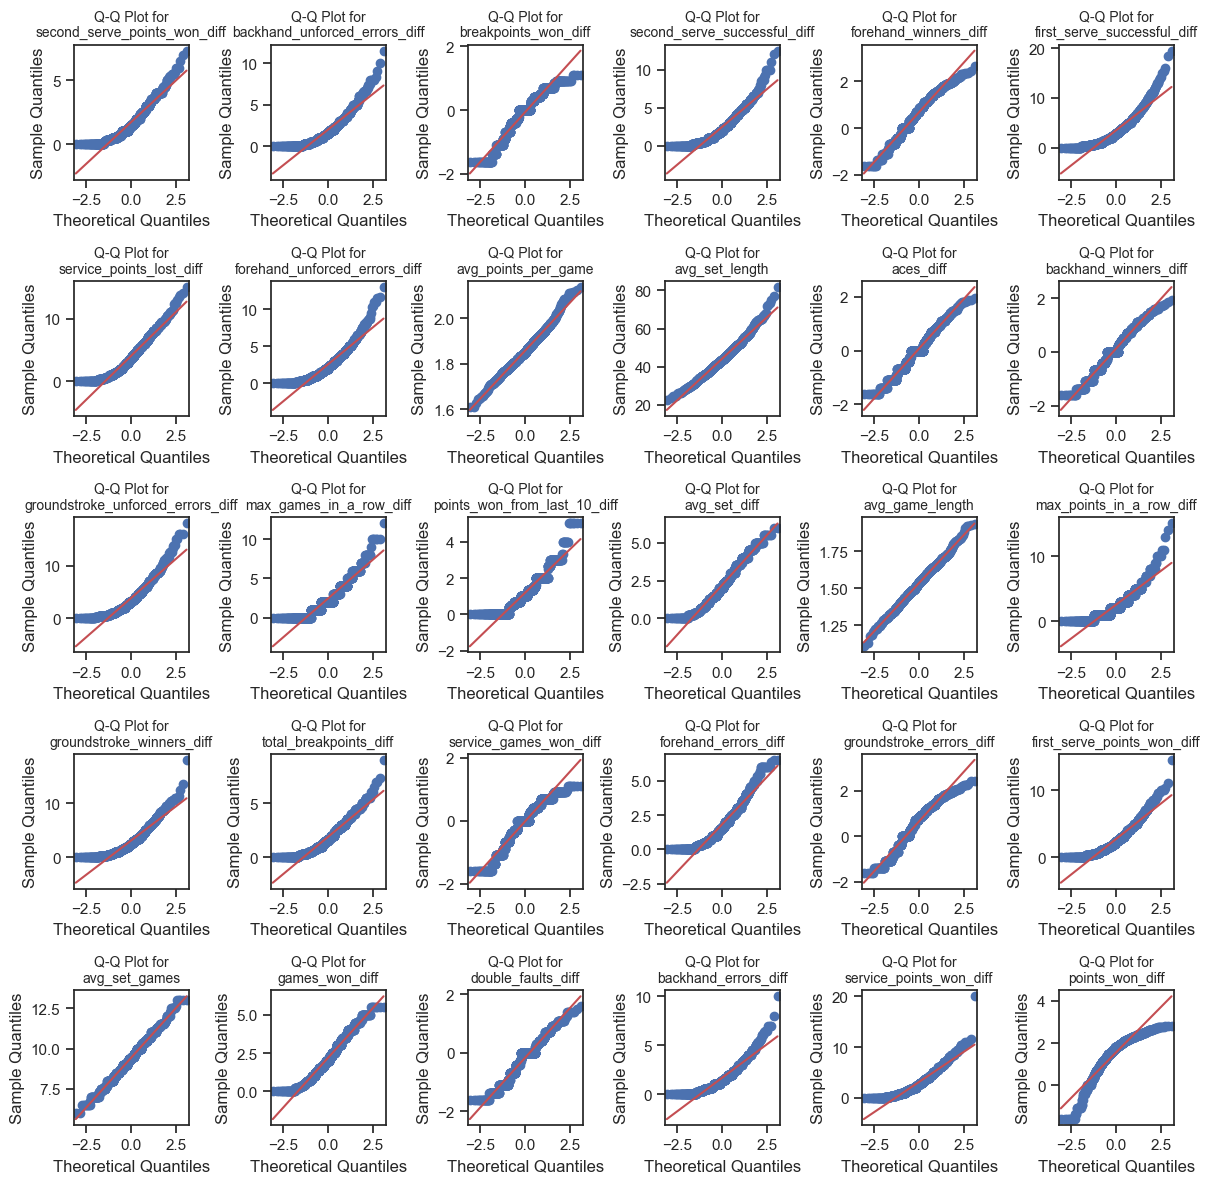

In [70]:
# Create a grid of Q-Q plots
fig, axes = plt.subplots(5, 6, figsize=(12, 12))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through each column and create a Q-Q plot
for i, column in enumerate(features_diff_df_log.columns):
    sm.qqplot(features_diff_df_log[column], line='s', ax=axes[i])
    axes[i].set_title(f'Q-Q Plot for\n{column}', fontsize = 10)

# Adjust layout
plt.tight_layout()
plt.show()

In [76]:
not_normal = []
normal = []
# Example: Shapiro-Wilk test for normality
for feature in features_diff_df_log.columns:
    stat, p_value = shapiro(features_diff_df_log[feature])
    print(f"{feature} SW test stat: {stat}, p-value: {p_value}")
    if p_value < .05:
        not_normal.append(feature)
    else:
        normal.append(feature)

print(not_normal)
print(normal)

second_serve_points_won_diff SW test stat: 0.9267757882764953, p-value: 4.734249861936878e-21
backhand_unforced_errors_diff SW test stat: 0.8940363344421107, p-value: 5.623522369230085e-25
breakpoints_won_diff SW test stat: 0.9459919497702408, p-value: 4.357207800843034e-18
second_serve_successful_diff SW test stat: 0.9109302978868066, p-value: 4.358179213493975e-23
forehand_winners_diff SW test stat: 0.9763272980777259, p-value: 2.8400321245020508e-11
first_serve_successful_diff SW test stat: 0.8846204371051398, p-value: 6.237304013308865e-26
service_points_lost_diff SW test stat: 0.9549297043620655, p-value: 1.9312220379101307e-16
forehand_unforced_errors_diff SW test stat: 0.9049161081873845, p-value: 8.665894229963561e-24
avg_points_per_game SW test stat: 0.9925771849209583, p-value: 0.00011367377940148187
avg_set_length SW test stat: 0.9876699072032463, p-value: 3.89918762925797e-07
aces_diff SW test stat: 0.9784795463782935, p-value: 1.3384506939196028e-10
backhand_winners_diff S

In [42]:
for feature in features_diff:
    plt_dist(stats_df, feature)

TypeError: 'module' object is not subscriptable

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
# Separating out the features
x = stats_df.loc[:, features_diff].values

# Separating out the target
y = stats_df.loc[:,"men"].values.astype(int)

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [83]:
features_diff_norm = pd.DataFrame(x,columns=features_diff)
features_diff_norm.tail()

max_games_in_a_row_diff  aces_diff  first_serve_successful_diff  \
940                 0.278599   0.036107                    -0.876020   
941                -0.223836  -0.241300                    -0.876020   
942                 0.781035  -1.073519                    -0.523301   
943                -0.223836   0.798975                    -0.258761   
944                -0.223836  -0.518706                    -0.053008   

     groundstroke_errors_diff  service_games_won_diff  backhand_errors_diff  \
940                  2.027741               -0.158350              0.716032   
941                  1.195017                0.808319              0.958467   
942                 -0.470432                0.324985             -0.253711   
943                  1.070108               -0.520851              0.594814   
944                  0.362292                0.324985             -1.223453   

     forehand_winners_diff  breakpoints_won_diff  games_won_diff  \
940              -0.008088              0.435831        0.105664   
941              -0.477495              0.435831        0.613623   
942              -1.103371             -0.056825        0.359643   
943               1.087194             -0.795808       -0.529285   
944              -0.633964             -0.549480        0.105664   

     avg_points_per_game  ...  avg_set_length  \
940             0.714847  ...        1.333024   
941             0.024070  ...        0.661710   
942             0.484818  ...        1.079770   
943             0.835914  ...        0.627826   
944             0.909378  ...        2.461213   

     groundstroke_unforced_errors_diff  service_points_won_diff  \
940                          -1.059425                -0.622797   
941                          -1.059425                 1.613841   
942                           0.054971                 0.076152   
943                          -0.279348                -0.483007   
944                          -0.725106                 0.355732   

     groundstroke_winners_diff  points_won_diff  max_points_in_a_row_diff  \
940                  -0.973970        -0.966828                  0.695848   
941                  -0.184276         0.311378                  0.215865   
942                  -0.710739         0.402678                  0.695848   
943                  -0.941066        -0.327725                  0.215865   
944                  -1.105586         0.220077                  0.695848   

     avg_set_games  second_serve_points_won_diff  forehand_errors_diff  \
940       0.184545                     -0.808185              1.814240   
941      -0.353753                      2.996221             -0.119108   
942       0.453694                     -0.554558             -0.602445   
943       0.049971                     -0.934998              1.028817   
944       0.722843                      1.728086              0.847566   

     points_won_from_last_10_diff  
940                     -0.551375  
941                      0.838646  
942                     -0.551375  
943                     -0.725127  
944                     -0.551375  

[5 rows x 30 columns]

Text(0.5, 1.0, 'Correlation Matrix')

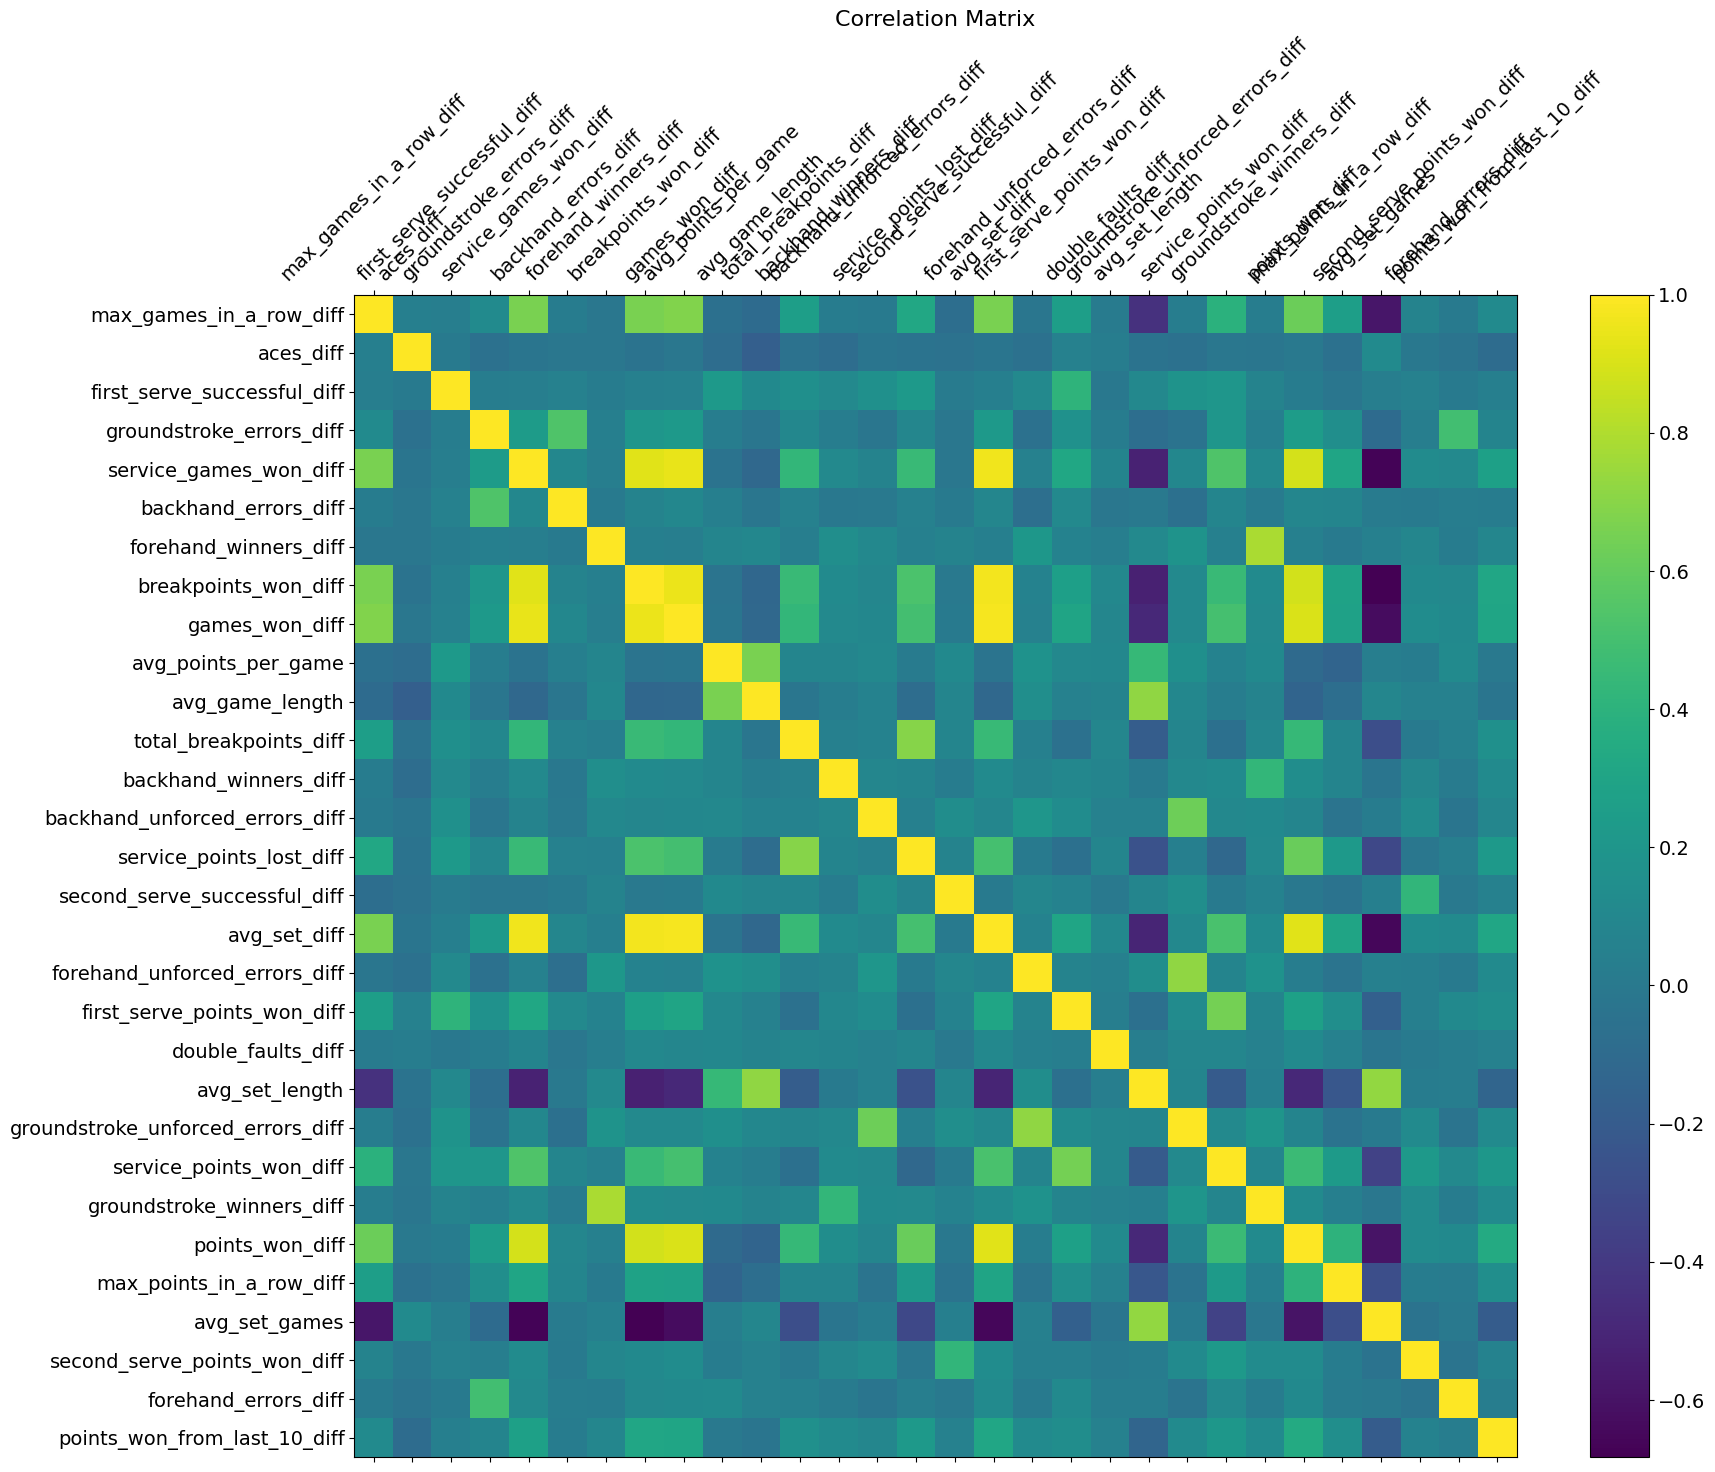

In [89]:
f = plt.figure(figsize=(19, 15))
plt.matshow(features_diff_norm.corr(), fignum=f.number)
plt.xticks(range(features_diff_norm.select_dtypes(['number']).shape[1]), features_diff_norm.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(features_diff_norm.select_dtypes(['number']).shape[1]), features_diff_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [56]:
from sklearn.decomposition import PCA
pca_features_diff = PCA(n_components=2)
principalComponents_features_diff = pca_features_diff.fit_transform(x)

In [64]:
pca_features_diff.get_covariance()

array([[ 9.10815473e-01,  8.10716782e-02,  2.40011274e-02, ...,
         1.96803269e-01,  9.23488369e-02,  4.27377067e-04],
       [ 8.10716782e-02,  9.16926776e-01,  1.35583288e-02, ...,
         6.58261786e-03,  4.31396064e-01, -3.17378320e-01],
       [ 2.40011274e-02,  1.35583288e-02,  9.03662209e-01, ...,
         1.16830655e-01,  3.24209292e-02,  7.17140360e-02],
       ...,
       [ 1.96803269e-01,  6.58261786e-03,  1.16830655e-01, ...,
         9.45178769e-01, -5.01577814e-02,  1.50244556e-01],
       [ 9.23488369e-02,  4.31396064e-01,  3.24209292e-02, ...,
        -5.01577814e-02,  1.56128767e+00, -6.55545609e-01],
       [ 4.27377067e-04, -3.17378320e-01,  7.17140360e-02, ...,
         1.50244556e-01, -6.55545609e-01,  1.25527911e+00]])

In [58]:
principal_features_diff_df = pd.DataFrame(data = principalComponents_features_diff
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principal_features_diff_df.tail()

principal component 1  principal component 2  principal component 3
940              -0.863258              -0.376554               2.787409
941               1.004046               1.006790               1.497270
942               0.049695               0.463170               0.970786
943              -2.154405               1.131576               3.183367
944              -1.464636               1.459685               1.806601

In [59]:
print('Explained variation per principal component: {}'.format(pca_features_diff.explained_variance_ratio_))

Explained variation per principal component: [0.20469275 0.07928423 0.05410798]


<Figure size 640x480 with 0 Axes>

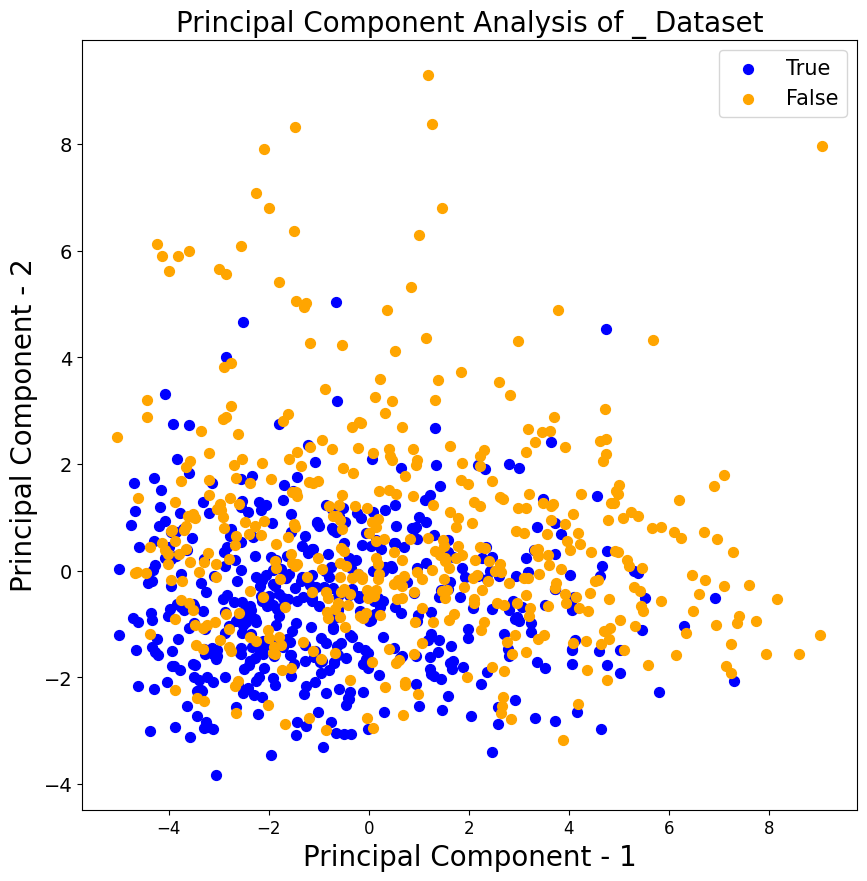

In [54]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of _ Dataset",fontsize=20)
targets = [True, False]
colors = ['blue', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = stats_df['men'] == target
    plt.scatter(principal_features_diff_df.loc[indicesToKeep, 'principal component 1'], principal_features_diff_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [46]:
stats_df.to_csv("data/df_progress.csv",index=False)